In [23]:
import pandas as pd
df = pd.read_csv('tuberculosis.csv')

In [25]:
# Cleaning column names
df.columns = (
    df.columns
    .str.replace(r'\(.*?\)', '', regex=True)
    .str.replace('Scaling Factor:1', '', regex=False)
    .str.replace(' ', '_')
    .str.replace(',', '')
    .str.strip()
)

In [29]:
# Converting year column to numeric
df['Year'] = df['Year'].str.extract(r'(\d{4})').astype(int)

In [35]:
# Renaming long columns to shorter and meaningful ones
df = df.rename(columns={
    'Country': 'Country',
    'State': 'State',
    'Year': 'Year',
    'Sector': 'Sector',
    'TB_KnownStatus': 'TB_KnownStatus',  # Already renamed
    'Percentage_Of_Tuberculosis__Patients_With_Known_Tobacco_Usage_Status_)_': 'TB_KnownStatus_Perc',
    'Number_Of_Tobacco_Users_Identified_Amongst_Screened__': 'TB_TobaccoIdentified',
    'Percentage_Of_Tobacco_Users_Identified_Amongst_Screened_)_': 'TobaccoIdentified_Perc',
    'TB_Linked': 'TB_CessationLinked',  # Already renamed previously
    'Percentage_Of_Tobacco_Users_Linked_With_Tobacco_Cessation_Centres_)_': 'CessationLinked_Perc',
    'Number_Of_Tuberculosis__Diabetes_Mellitus__Patients_Linked_To_Diabetic_Treatment__': 'TB_DM_Treated',
    'TB_DM': 'TB_DM',
    'TB_Notified': 'TB_Notified',
    'TB_GlucoseStatus': 'TB_GlucoseStatus'
})

In [37]:
# Previewing new column names
print(df.columns.tolist())

['Country', 'State', 'Year', 'Sector', 'TB_KnownStatus', 'TB_KnownStatus_Perc', 'TB_TobaccoIdentified', 'TobaccoIdentified_Perc', 'TB_CessationLinked', 'CessationLinked_Perc', 'TB_DM_Treated', 'TB_DM', 'TB_Notified', 'TB_GlucoseStatus']


In [39]:
df.head()


,Country,State,Year,Sector,TB_KnownStatus,TB_KnownStatus_Perc,TB_TobaccoIdentified,TobaccoIdentified_Perc,TB_CessationLinked,CessationLinked_Perc,TB_DM_Treated,TB_DM,TB_Notified,TB_GlucoseStatus
0,India,Andaman And Nicobar Islands,2024,Public,459.0,80.7,55.0,12.0,13.0,23.6,NaN,NaN,NaN,NaN
1,India,Andaman And Nicobar Islands,2024,Private,4.0,30.8,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,India,Andhra Pradesh,2024,Public,60433.0,95.3,8363.0,13.8,2181.0,26.1,NaN,NaN,NaN,NaN
3,India,Andhra Pradesh,2024,Private,25556.0,96.5,1300.0,5.1,247.0,19.0,NaN,NaN,NaN,NaN
4,India,Arunachal Pradesh,2024,Public,1900.0,67.7,228.0,12.0,88.0,38.6,NaN,NaN,NaN,NaN


In [41]:
# Grouping by State
df_statewise = df.groupby('State').sum(numeric_only=True).reset_index()

In [43]:
# Calculate metrics
df_statewise['Linkage_Rate'] = (
    df_statewise['TB_CessationLinked'] /
    df_statewise['TB_TobaccoIdentified']
).fillna(0)

df_statewise['Identification_Rate'] = (
    df_statewise['TB_TobaccoIdentified'] /
    df_statewise['TB_KnownStatus']
).fillna(0)

#### Top 10 States by known Tobacco Status

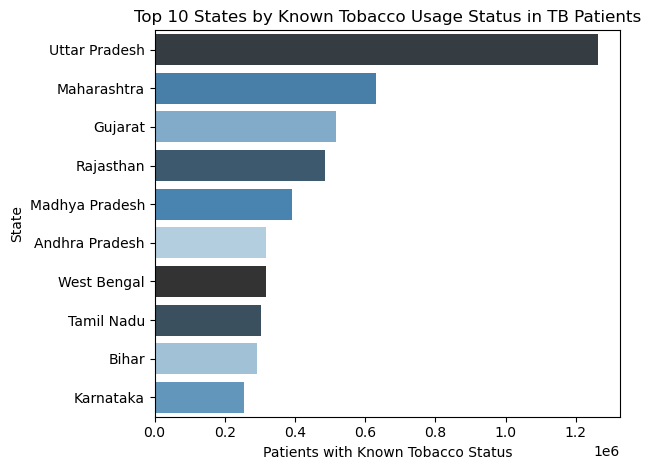

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
top_known = df_statewise.sort_values('TB_KnownStatus', ascending=False).head(10)

sns.barplot(data=top_known, x='TB_KnownStatus', y='State', hue=top_known.index, legend = False, palette='Blues_d')
plt.title('Top 10 States by Known Tobacco Usage Status in TB Patients')
plt.xlabel('Patients with Known Tobacco Status')
plt.ylabel('State')
plt.tight_layout()
plt.show()

#### Histogram of Linkage Rate to Cessation Centres

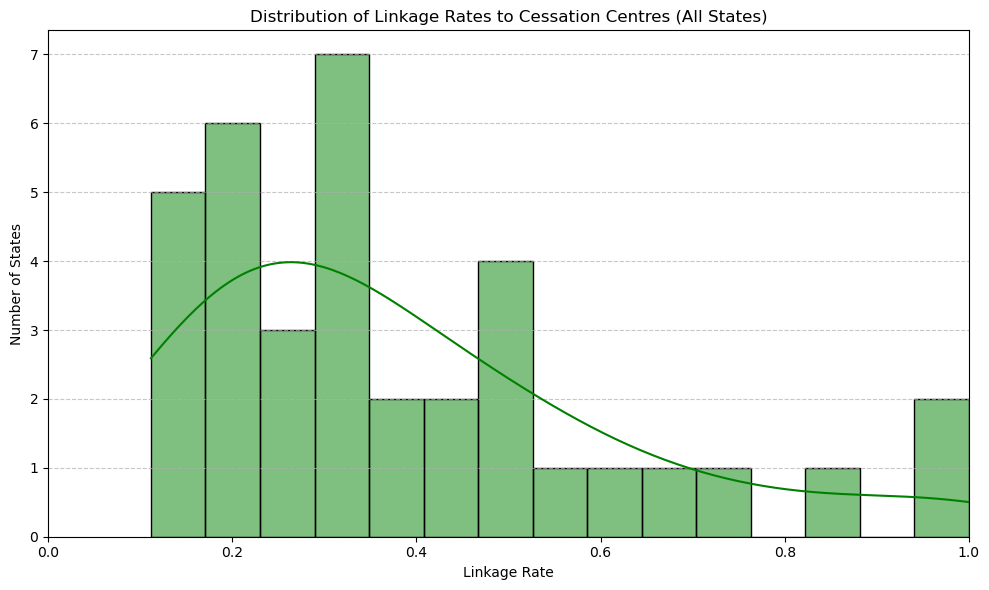

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(df_statewise['Linkage_Rate'], bins=15, kde=True, color='green', edgecolor='black')

plt.title('Distribution of Linkage Rates to Cessation Centres (All States)')
plt.xlabel('Linkage Rate')
plt.ylabel('Number of States')
plt.xlim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Lollipop chart- Top 10 States by Identification Rate of Tobacco Users

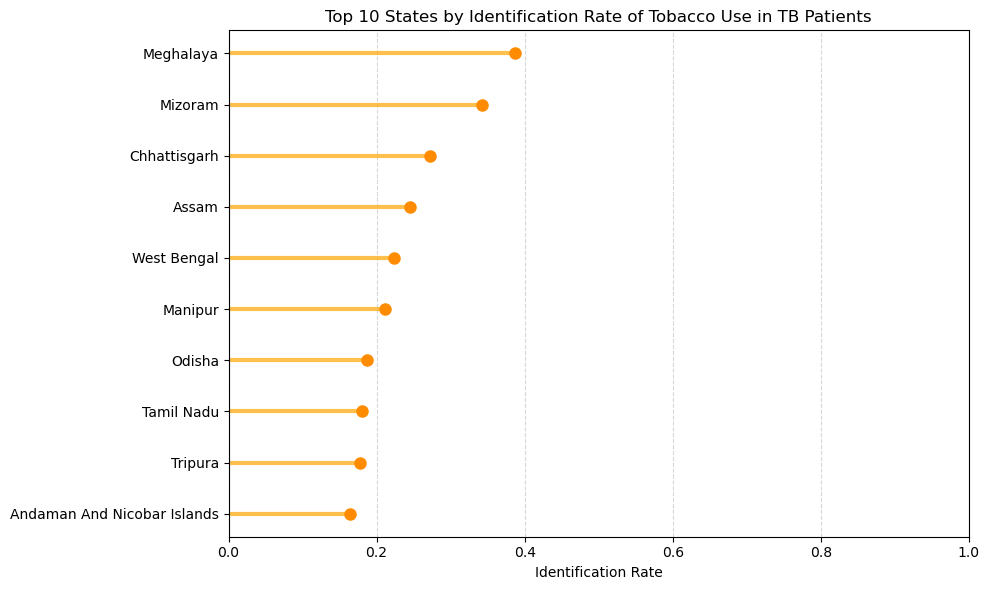

In [85]:
# Sort top 10 again for plotting
top_identified = df_statewise.sort_values('Identification_Rate', ascending=True).tail(10)

plt.figure(figsize=(10, 6))
plt.hlines(y=top_identified['State'], xmin=0, xmax=top_identified['Identification_Rate'], color='orange', alpha=0.7, linewidth=3)
plt.plot(top_identified['Identification_Rate'], top_identified['State'], "o", markersize=8, color='darkorange')
plt.title('Top 10 States by Identification Rate of Tobacco Use in TB Patients')
plt.xlabel('Identification Rate')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Trend Over Years (Line Plot)
Insight: How are known tobacco cases, identification, or linkage changing over time?

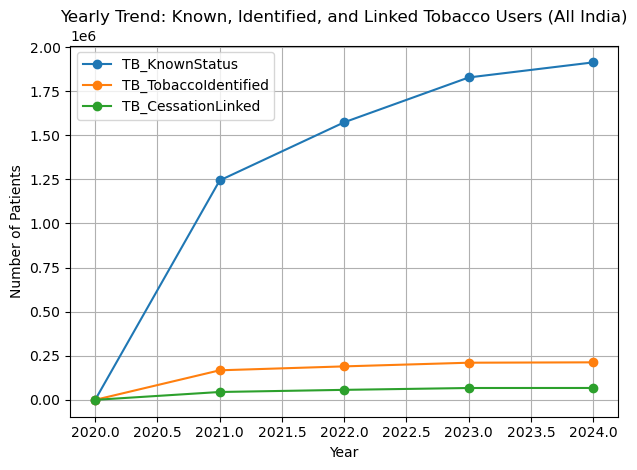

In [91]:
df_yearly = df.groupby('Year')[['TB_KnownStatus', 'TB_TobaccoIdentified', 'TB_CessationLinked']].sum().reset_index()

df_yearly.plot(x='Year', kind='line', marker='o')
plt.title('Yearly Trend: Known, Identified, and Linked Tobacco Users (All India)')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.tight_layout()
plt.show()

### Stacked Bar Chart – Tobacco Identification & Linkage per State
Insight: Compare tobacco user identification vs linkage side-by-side per state

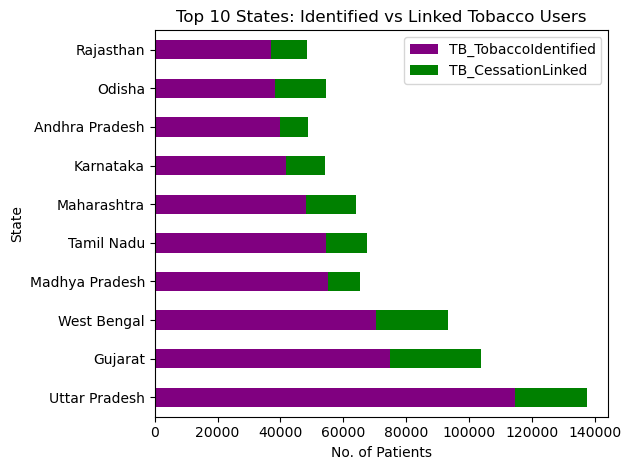

In [96]:
subset = df_statewise[['State', 'TB_TobaccoIdentified', 'TB_CessationLinked']].sort_values('TB_TobaccoIdentified', ascending=False).head(10)
subset.set_index('State')[['TB_TobaccoIdentified', 'TB_CessationLinked']].plot(kind='barh', stacked=True, color=['purple', 'green'])

plt.title('Top 10 States: Identified vs Linked Tobacco Users')
plt.xlabel('No. of Patients')
plt.tight_layout()
plt.show()

### TB + Diabetes Comorbidity Comparison
Insight: States with high TB + Diabetes comorbidity. Is follow-up treatment being provided?

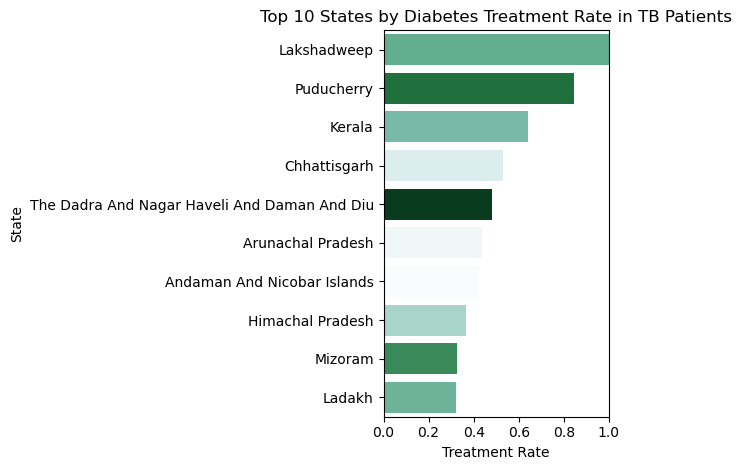

In [101]:
df_statewise['DM_Treatment_Rate'] = (
    df_statewise['TB_DM_Treated'] / df_statewise['TB_DM']
).fillna(0)

top_dm = df_statewise.sort_values('DM_Treatment_Rate', ascending=False).head(10)

sns.barplot(data=top_dm, x='DM_Treatment_Rate',hue=top_dm.index, legend = False, y='State', palette='BuGn')
plt.title('Top 10 States by Diabetes Treatment Rate in TB Patients')
plt.xlabel('Treatment Rate')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()


### Correlation Heatmap
Insight: Is there a correlation between TB notifications, glucose status, tobacco identification, etc.?

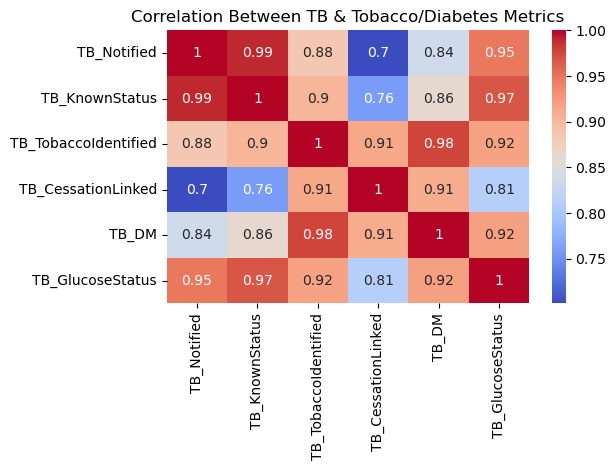

In [104]:
corr_cols = ['TB_Notified', 'TB_KnownStatus', 'TB_TobaccoIdentified', 'TB_CessationLinked', 'TB_DM', 'TB_GlucoseStatus']
sns.heatmap(df_statewise[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between TB & Tobacco/Diabetes Metrics')
plt.tight_layout()
plt.show()


### Scatter Plot – Tobacco Identified vs Linked
Insight: Do states that identify more tobacco users also link more to cessation?

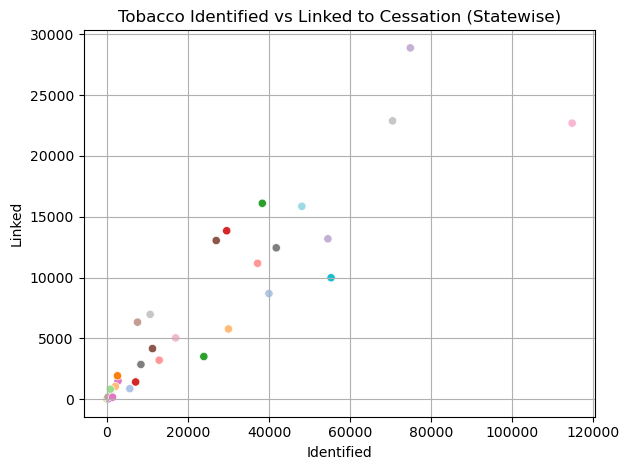

In [109]:
sns.scatterplot(data=df_statewise, x='TB_TobaccoIdentified', y='TB_CessationLinked', hue='State', palette='tab20', legend=False)
plt.title('Tobacco Identified vs Linked to Cessation (Statewise)')
plt.xlabel('Identified')
plt.ylabel('Linked')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv("cleaned_tuberculosis_data.csv", index=False)
df_statewise.to_csv("statewise_tb_summary.csv", index=False)